In [61]:
from nilearn import plotting
from nilearn import image
import nilearn
import nibabel as nib


In [62]:
subjectDir = "../../data/preprocessed/sub-9001/"
sessionDir = "ses-1/"


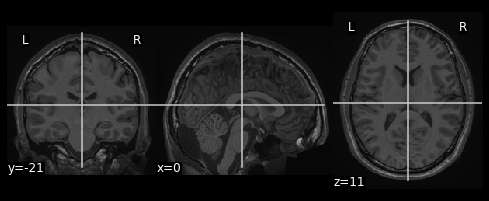

In [63]:
# Plot anatomy image
plotting.plot_anat(subjectDir + 
    "anat/sub-9001_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz")


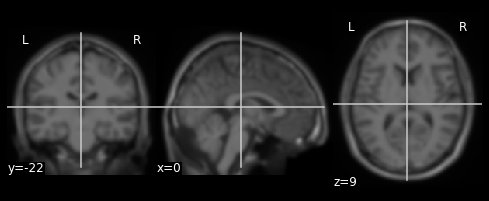

In [64]:
# Read from and return Nifti image object that is smoothed.
smoothed_img = image.smooth_img(subjectDir + 
    "anat/sub-9001_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz", fwhm=5)   
disp = plotting.plot_anat(smoothed_img)


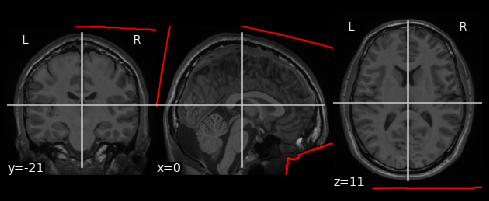

In [65]:
# Read from and return Nifti image object that is smoothed.
smoothed_img = image.smooth_img(subjectDir + 
    "anat/sub-9001_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz", fwhm='fast')   
disp = plotting.plot_anat(smoothed_img)
disp.add_contours(smoothed_img, levels=[0.5], colors='r')


In [66]:
# Attempt to read and generate slideshow for 4D image: Normalized MNI Asym file
# NOTE: uncomment/comment stuff to actually generate the images to be used for slideshow.html
i = 0
while i < 100:
    normalized_image = image.index_img(subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz", i)

    # plt = plotting.plot_img(normalized_image, cut_coords=[0,0,0])
    # plt.savefig('./plots/series-normalized/' + str(i) + '.png')
    # plt.close()
    # i += 1
    i += 20


In [67]:
# Attempt to read generate slideshow for 4D image: Non-normalized file
# NOTE: uncomment/comment stuff to actually generate the images to be used for slideshow.html
i = 0
while i < 100:
    nonnormalized_image = image.index_img(subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-faces_space-T1w_desc-preproc_bold.nii.gz", i)

    # plt = plotting.plot_img(nonnormalized_image, cut_coords=[0,0,0])
    # plt.savefig('./plots/series-nonnonmalized/' + str(i) + '.png')
    # plt.close()
    # i += 1
    i += 20


In [68]:
# How many images in the time dimension?
iterable = image.iter_img(subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz")
sum(1 for _ in iterable)


165

In [69]:
# Alternate method: Using Nibabel to load 4D image
img = nib.load(subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz")


In [70]:
# Examine the header of the 4D image
print(img.header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 104 123  81 165   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    1.875 1.875 2.4   3.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 9784.871
cal_min         : -728.3873
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.2.5).'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96

In [71]:
# What is the shape of the 4D image?
img.header.get_data_shape()


(104, 123, 81, 165)

In [72]:
# What type of data is the 4D image?
img.dataobj


In [73]:
# Is this a proxy array?
nib.is_proxy(img.dataobj)


True

In [90]:
# We first create a masker, and ask it to normalize the data to improve the
# decoding. The masker will extract a 2D array ready for machine learning
# with nilearn:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz", standardize=True)
fmri_masked = masker.fit(normalized_image)


In [91]:
# Generate a report with the mask on normalized image
report = masker.generate_report()
report


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,../../data/preprocessed/sub-9001/ses-1/func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [92]:
# Check out the shape of normalized image with mask applied
norm_maskapplied = masker.fit_transform(normalized_image)
print(norm_maskapplied)
norm_maskapplied.shape


[[ 327.83151758  192.11447003  323.98138857 ...  965.18829049
   561.2455887  1010.10646226]]


(1, 222528)

In [93]:
# Sanity check, generate a report with a mask on non-normalized image
fmri_masked_non_norm = masker.fit(nonnormalized_image)
report = masker.generate_report()
report


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,../../data/preprocessed/sub-9001/ses-1/func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [94]:
# Check out the shape of non-normalized image with mask applied
nonnorm_maskapplied = masker.fit_transform(nonnormalized_image)
print(nonnorm_maskapplied)
nonnorm_maskapplied.shape


[[0. 0. 0. ... 0. 0. 0.]]


(1, 222528)